In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os.path import join, abspath
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sys
sys.path.insert(0, abspath("./../../"))

In [4]:
from utils.pandas import apply_filters
from utils.plt import configure_ax

In [5]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

### Load result file

In [6]:
csv_path = "../../results/action_temporality.csv"

In [7]:
df = pd.read_csv(csv_path)
df.dropna(inplace=True)

In [8]:
for c in set(df.columns) - {"Frames", "Kinetics"}:
    df[c] = df[c].apply(lambda x: x.split("\u200b")[0]).astype(float)

In [9]:
df

,Frames,UCF,SS,Gym99,NTU,EPIC (verbs),Kinetics
0,1,80.04,18.69,60.61,56.88,28.33,0
1,8,91.22,40.89,83.71,90.45,36.06,0
2,16,93.58,52.88,88.11,93.89,40.22,0
3,32,94.01,61.05,91.77,94.90,47.67,0


### Plot

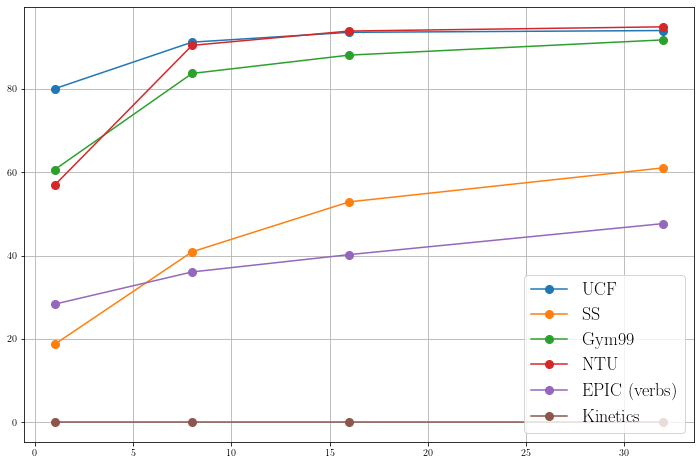

In [16]:
H, W = 10, 13

legendsize = 18

fig, ax = plt.subplots(figsize=(12, 8))

ax.grid()

for d in df.columns:
    if d == "Frames":
        continue
    ax.plot(df["Frames"], df[d], label=d, marker="o", markersize=8,)
    
ax.legend(fontsize=legendsize)
plt.show()

In [12]:
delta_df = df.copy()
for d in set(df.columns) - {"Frames"}:
    delta_df[d] = df[d] - df.loc[0, d]

In [13]:
delta_df

,Frames,UCF,SS,Gym99,NTU,EPIC (verbs),Kinetics
0,1,0.00,0.00,0.00,0.00,0.00,0
1,8,11.18,22.20,23.10,33.57,7.73,0
2,16,13.54,34.19,27.50,37.01,11.89,0
3,32,13.97,42.36,31.16,38.02,19.34,0


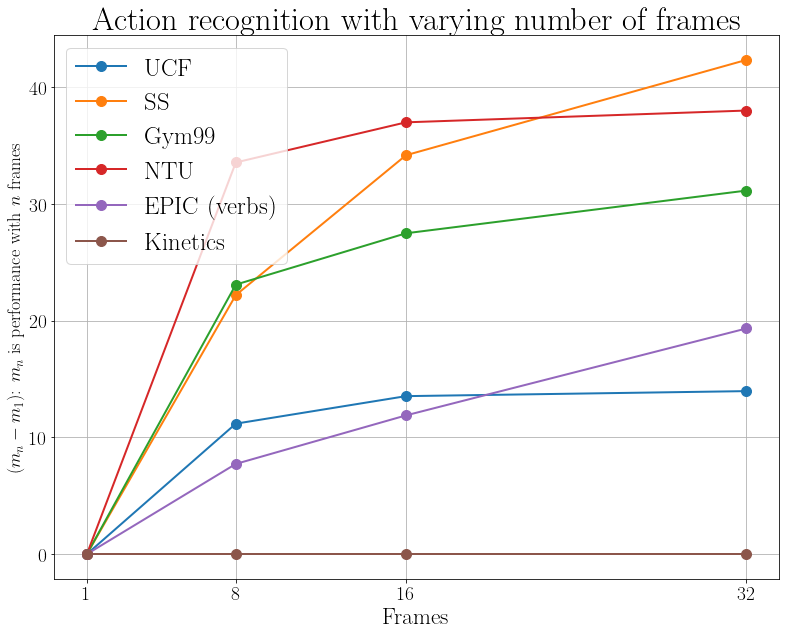

In [23]:
H, W = 10, 13

fig, ax = plt.subplots(figsize=(W, H))

for d in df.columns:
    if d == "Frames":
        continue
    ax.plot(delta_df["Frames"], delta_df[d], label=d, marker="o", markersize=10, linewidth=2.0)
    
ax.set_title(r"Action recognition with varying number of frames")
ax.set_xlabel("Frames")
ax.set_ylabel("($m_{n} - m_{1})$: $m_n$ is performance with $n$ frames")
ax.set_xticks(ticks=[1, 8, 16, 32])
configure_ax(ax=ax, H=H, W=W)

plt.savefig("../../results/plots/action_temporality_v1.pdf", bbox_inches="tight")
plt.show()

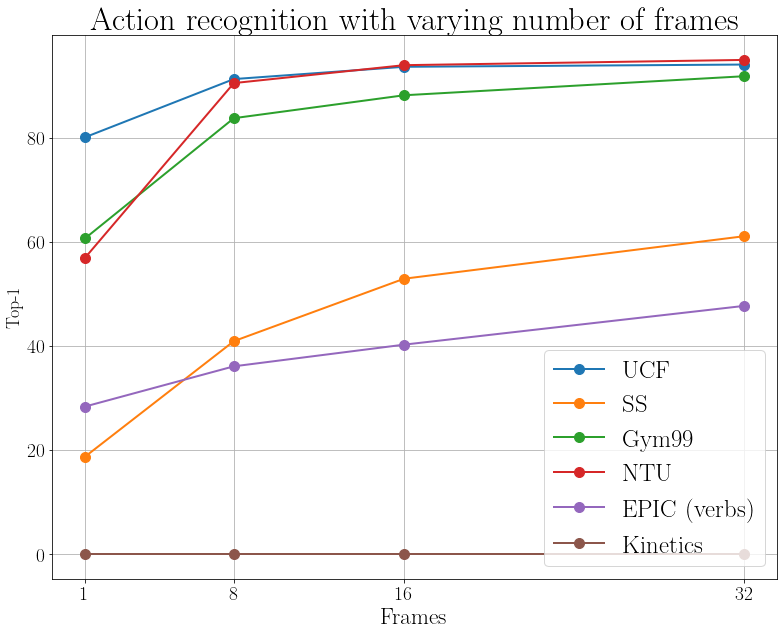

In [24]:
H, W = 10, 13

fig, ax = plt.subplots(figsize=(W, H))

for d in df.columns:
    if d == "Frames":
        continue
    ax.plot(df["Frames"], df[d], label=d, marker="o", markersize=10, linewidth=2.0)
    
ax.set_title(r"Action recognition with varying number of frames")
ax.set_xlabel("Frames")
ax.set_ylabel("Top-1")
ax.set_xticks(ticks=[1, 8, 16, 32])
configure_ax(ax=ax, H=H, W=W)

plt.savefig("../../results/plots/action_temporality_v2.pdf", bbox_inches="tight")
plt.show()

### Junk

In [82]:
diff_df = df.set_index("Frames")
diff_df = diff_df.diff(periods=1)
diff_df = diff_df.fillna(0)

In [83]:
diff_df

,UCF,SS,Gym99,NTU,EPIC (verbs),Kinetics
Frames,,,,,,
1,0.00,0.00,0.00,0.00,0.00,0.0
8,11.18,22.20,23.10,33.57,7.73,0.0
16,2.36,11.99,4.40,3.44,4.16,0.0
32,0.43,8.17,3.66,1.01,7.45,0.0


In [68]:
np.polyfit(x=df["Frames"].values, y=df["UCF"].values, deg=2)

array([-3.26733671e-02,  1.49562463e+00,  7.93862688e+01])

In [64]:
np.polyfit(x=df["Frames"].values, y=df["SS"].values, deg=2)

array([-0.06116741,  3.35406287, 16.14964724])

In [65]:
np.polyfit(x=df["Frames"].values, y=df["Gym99"].values, deg=2)

array([-0.06169646,  2.96645485, 59.52345328])

In [66]:
np.polyfit(x=df["Frames"].values, y=df["EPIC (verbs)"].values, deg=2)

array([-1.26945583e-02,  1.02666809e+00,  2.77085249e+01])